<a href="https://colab.research.google.com/github/OdysseusPolymetis/colabs_for_nlp/blob/main/2_analyse_textuelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALYSE TEXTUELLE, LES BASES**

In [1]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 34.7 MB/s eta 0:00:00


##Qu'est-ce que c'est que l'analyse textuelle (automatique), rapidement
En fait ça peut toucher beaucoup de domaines. Ici, on va en voir plusieurs, entre autres la **tokenisation**, la **lemmatisation**, le **postagging**. J'appellerai ça les étapes de "pre-processing", de travail préliminaire.
<br>En effet, on a très souvent besoin, pour faire des choses plus poussées, de ces étapes pour éviter de créer des biais dans les analyses qui vont suivre.
<br>Voici quelques exemples de biais possibles, si l'on ne passe pas par certaines de ces étapes de pré-traitement.

Prenons l'exemple des nuages de mots. C'est globalement facile à faire, et ça permet souvent (de manière parfois un peu artificielle) d'illustrer son propos.
Ici voyons ce qu'on obtient si on fait un nuage de mots sur les _Trois Mousquetaires_.

![](https://drive.google.com/uc?export=view&id=1g8RLOXodDDGBgfR6tJ-jvVG1JHTdz65f)

Ce nuage est fait avec des données brutes. C'est-à-dire qu'on a juste injecté les mots du texte, tels quels. Globalement, on ne peut pas en faire grand chose et ce n'est pas représentatif. Pourquoi ? Déjà parce que chaque mot est encore fléchi, et donc pour chaque "fut", "est", "sera", chaque mot est compté comme un mot à part, et non comme une forme de "être".
<br>Une première solution est donc de **lemmatiser**.

![](https://drive.google.com/uc?export=view&id=10vv3sdsqLMBMXYW5-YAKp9ztgYq_sJDs)

C'est déjà mieux, mais ça n'est pas fou non plus. Il y a encore de nombreux mots dont on se fiche complètement. Exemple, "faire", "plus", etc.
<br>On a donc encore une étape, celle d'enlever les **mots-outils**, ou "stopwords", et la ponctuation. Les mots-outils sont les mots qui n'ont qu'un faible poids sémantique (qui peuvent avoir leur importance pour une étude dédiée, certes), mais qui font du bruit lors d'une analyse statistique de base.
<br>Enlevons-les.

![](https://drive.google.com/uc?export=view&id=1c9PxvrkXDTNZTC7QOGNCi2qOQ5_fI9th)

##Comment on pré-traite ?
Il y a plusieurs écoles, et donc aussi plusieurs modules pour le faire.
<br>D'expérience personnelle, il y a les modules rapides et qui donnent des résultats plus mitigés, et des modules plus longs qui sont généralement meilleurs (mais pas forcément).
<br>Ici, je vais vous montrer trois modules avec des qualités et des défauts, pour le français (mais ils ont aussi des modèles en d'autres langues).

##<center>**LE TAL : TOKENISATION, LEMMATISATION, POSTAGGING**</center>

Nous allons tester un outil qui permet de faire ces trois opérations, **`stanza`**. Il en existe beaucoup d'autres.

In [3]:
preface="Tant qu’il existera, par le fait des lois et des mœurs, une damnation sociale créant artificiellement, en pleine civilisation, des enfers, et compliquant d’une fatalité humaine la destinée qui est divine ; tant que les trois problèmes du siècle, la dégradation de l’homme par le prolétariat, la déchéance de la femme par la faim, l’atrophie de l’enfant par la nuit, ne seront pas résolus ; tant que, dans de certaines régions, l’asphyxie sociale sera possible ; en d’autres termes, et à un point de vue plus étendu encore, tant qu’il y aura sur la terre ignorance et misère, des livres de la nature de celui-ci pourront ne pas être inutiles."

In [4]:
!gdown 1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo

Downloading...
From: https://drive.google.com/uc?id=1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo
To: /content/miserables.txt
100% 3.17M/3.17M [00:00<00:00, 196MB/s]


In [5]:
filepath_of_text = "/content/miserables.txt"

In [6]:
full_text = open(filepath_of_text, encoding="utf-8").read()

##**stanza (ancien Stanford CoreNLP)**

Personnellement, c'est l'analyseur que j'utilise quand je n'ai pas besoin de faire de représentations graphiques de mes résultats. Il est rapide et efficace.

Je mentionne `stanza` en particulier pour trois raisons :
<br>- d'abord parce qu'il dispose d'un très grand nombre de modèles de langue, et pas forcément des langues très répandues,
<br>- ensuite parce qu'il est très rapide, et niveau performance tout à fait satisfaisant pour les gros corpus,
<br>- enfin parce que je le trouve facile à manipuler et à implémenter.

Mais il faut garder en tête qu'il en existe bien d'autres qui fonctionnent vraiment très bien, avec un nombre de modèles qui se multiplie. Je pense au tagger de BERT,  ou de `flair` entre autres. Mais ça nécessite d'être un peu plus aguerri.

Là encore, il existe plusieurs modèles rien que pour le français (je vous mets ici la [liste des modèles](https://stanfordnlp.github.io/stanza/performance.html) dans d'autres langues), mais le modèle par défaut peut être appelé avec `fr`.
<br>C'est un modèle sur du français moderne, donc ne fonctionne pas avec l'ancien français etc. (mais un modèle existe aussi pour l'ancien français, appelé par défaut avec `fro`).

In [8]:
import stanza
stanza.download('fr')

INFO:stanza:Downloading default packages for language: fr (French) ...
INFO:stanza:File exists: /root/stanza_resources/fr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


On commence par lui spécifier une Pipeline, c'est-à-dire qu'on lui signifie quels processeurs il va devoir mobiliser pour les opérations suivantes et en quelle langue. L'avantage de cette opération est qu'on ne mobilise pas l'artillerie lourde quand on veut faire des opérations simples).

In [9]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Maintenant, nous pouvons lancer le TAL sur la préface.

In [10]:
miserables_stanza=nlp_stanza(preface)

Voyons maintenant ses résultats.

In [11]:
for sent in miserables_stanza.sentences:
  for token in sent.words:
    print(token.text + ' - ' + token.lemma + ' - ' + token.pos)

Tant - tant - ADV
qu’ - que - SCONJ
il - lui - PRON
existera - exister - VERB
, - , - PUNCT
par - par - ADP
le - le - DET
fait - fait - NOUN
de - de - ADP
les - le - DET
lois - loi - NOUN
et - et - CCONJ
des - un - DET
mœurs - mœur - NOUN
, - , - PUNCT
une - un - DET
damnation - damnation - NOUN
sociale - social - ADJ
créant - créer - VERB
artificiellement - artificiellement - ADV
, - , - PUNCT
en - en - ADP
pleine - plein - ADJ
civilisation - civilisation - NOUN
, - , - PUNCT
des - un - DET
enfers - enfer - NOUN
, - , - PUNCT
et - et - CCONJ
compliquant - compliquer - VERB
d’ - de - ADP
une - un - DET
fatalité - fatalité - NOUN
humaine - humain - ADJ
la - le - DET
destinée - destiner - NOUN
qui - qui - PRON
est - être - AUX
divine - divin - ADJ
; - ; - PUNCT
tant - tant - ADV
que - que - SCONJ
les - le - DET
trois - trois - NUM
problèmes - problème - NOUN
de - de - ADP
le - le - DET
siècle - siècle - NOUN
, - , - PUNCT
la - le - DET
dégradation - dégradation - NOUN
de - de - ADP
l’ - 

Globalement ça marche d'enfer.

##<center>**LES ENTITES NOMMEES**</center>

Les **entités nommées** sont des éléments textuels connus et catégorisables. Par exemple, un NER (Named Entity Recognition) qui fonctionnerait bien comprendrait "la ville aux sept collines" comme un nom de lieu, et comme Rome.

##**stanza**

**`stanza`** aussi peut permettre de façon beaucoup plus rapide d'obtenir les NER. Ne serait-ce que parce que, par défaut, il demande de définir une Pipeline (un processus qui permet de ne pas faire toutes les opérations en même temps).

In [12]:
stanza_ner = stanza.Pipeline(lang='fr', processors='tokenize,ner')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | wikiner  |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [13]:
doc = stanza_ner("qui avaient couru sur son compte au moment où il était arrivé dans le diocèse. Vrai ou faux, ce qu'on dit des hommes tient souvent autant de place dans leur vie et surtout dans leur destinée que ce qu'ils font. M. Myriel était fils d'un conseiller au parlement d'Aix ; noblesse de robe.")

In [14]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

entity: Myriel	type: PER
entity: Aix	type: LOC


Les résultats sont bons pour ce passage, semble-t-il.

#**EN APARTE : POURQUOI L'XML/TEI ENRICHI EST UN TRÉSOR QUAND ON EN A**

Ici je vais vous montrer (rapidement) à quel point il est facile de réexploiter un XML correct et riche.
<br>Je vais partir d'un XML tiré de Frantext qui est une énorme base de données avec des XML/TEI taggés.

In [15]:
from lxml import etree as ET
import string
import sys
import gdown

In [16]:
!gdown --id 1YWZPfc0PINJ0HpYp8HkqAuDZVsts8ikl
url="https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1Qrppa0yYebFUVLEpnp58M86B8J3rwOVV"
output="/content/le_rouge_et_le_noir.xml"
gdown.download(url, output, quiet=False)

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YWZPfc0PINJ0HpYp8HkqAuDZVsts8ikl
To: /content/stopwords.txt
100% 4.65k/4.65k [00:00<00:00, 14.9MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1Qrppa0yYebFUVLEpnp58M86B8J3rwOVV
To: /content/le_rouge_et_le_noir.xml
100%|██████████| 9.01M/9.01M [00:00<00:00, 111MB/s]


'/content/le_rouge_et_le_noir.xml'

In [ ]:
stopwords=list()
stop = open("/content/stopwords.txt", 'r')
for word in stop.read().split(" "):
    stopwords.append(word)

In [ ]:
rouge_et_noir = "/content/le_rouge_et_le_noir.xml"

In [ ]:
def strip_ns_prefix(tree):
    for element in tree.xpath('descendant-or-self::*'):
        if element.prefix:
            element.tag = ET.QName(element).localname
    return tree

In [ ]:
tree = ET.parse(rouge_et_noir)
root = strip_ns_prefix(tree.getroot())
elems = root.findall(".//wf[@lemma]")
words = list()
for elem in elems:
    if elem.attrib["lemma"] not in string.punctuation and elem.attrib["lemma"] not in stopwords and "&quot;" not in elem.attrib["lemma"]:
        words.append(elem.attrib["lemma"])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(words))

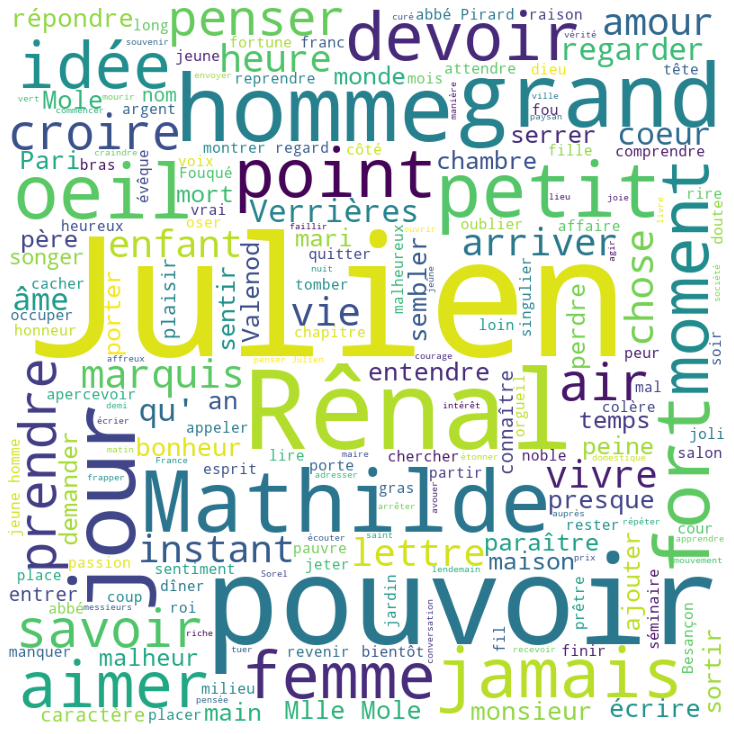

In [ ]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()